SVR
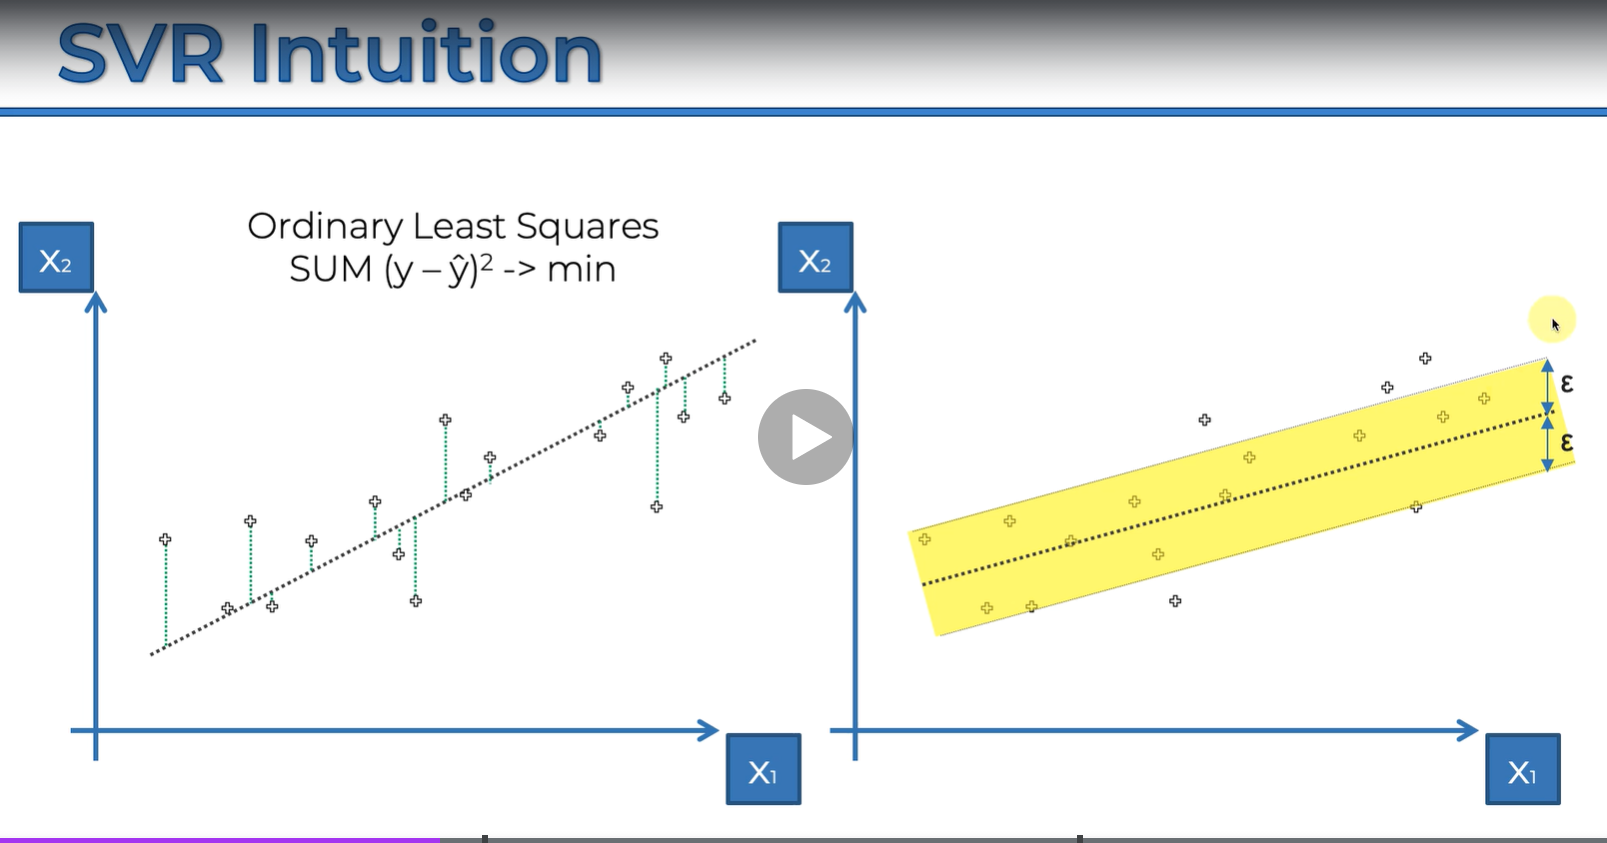
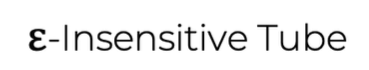

Esse Insensitive Tube significa dizer que a gente permite o erro na "largura" desse tubo

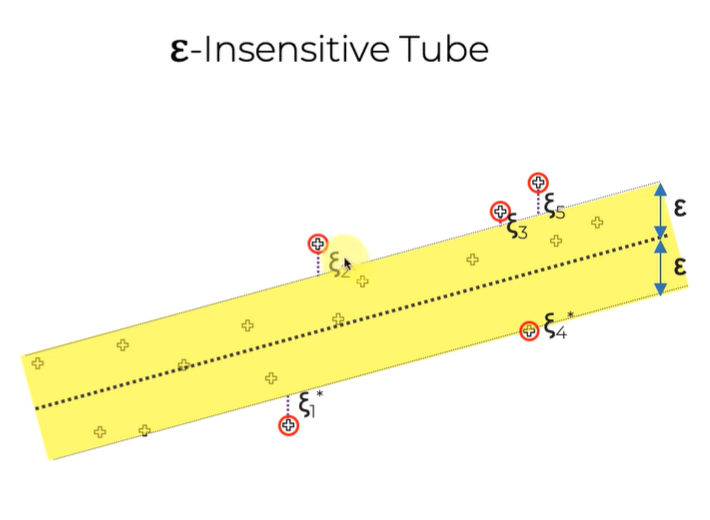
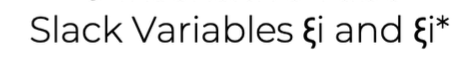

Da mesma forma que tentamos minimizar os erros de um regressão linar normal, aqui tentamos minimizar os Slacks Variables (distancia do tudo para o ponto) usando a formula:
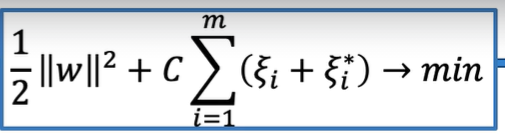

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
# precisamos arrumar esse y
y = y.reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
# tem que fazer separado para as variaveis ind e para dep
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf") #linear kernel
regressor.fit(X, y)

C:\Users\lucas_alves\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

https://data-flair.training/blogs/svm-kernel-functions/
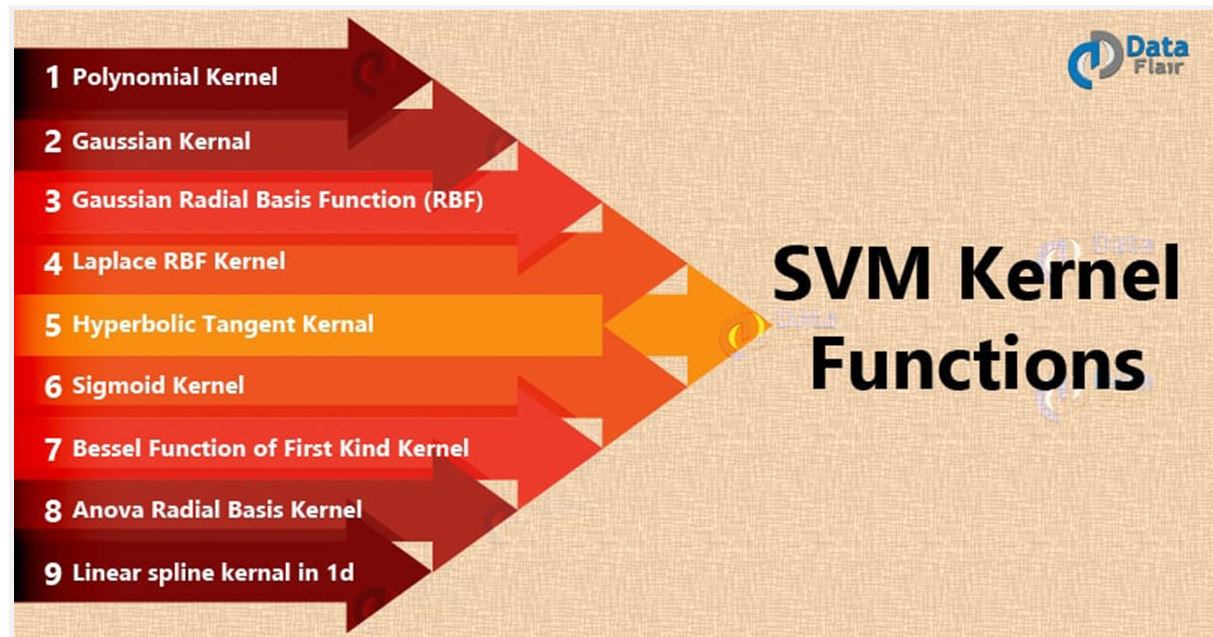

In [10]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) # tenho que manter a mesma escala das features que foram escalonadas

array([170370.0204065])

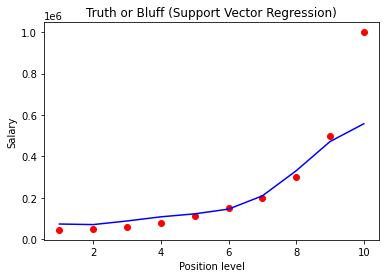

In [22]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color ="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

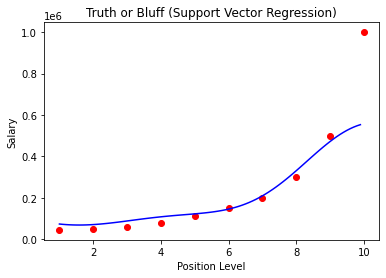

In [26]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1) # mudando os steps dos do eixo x
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color ="blue")
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()